<AxesSubplot: >

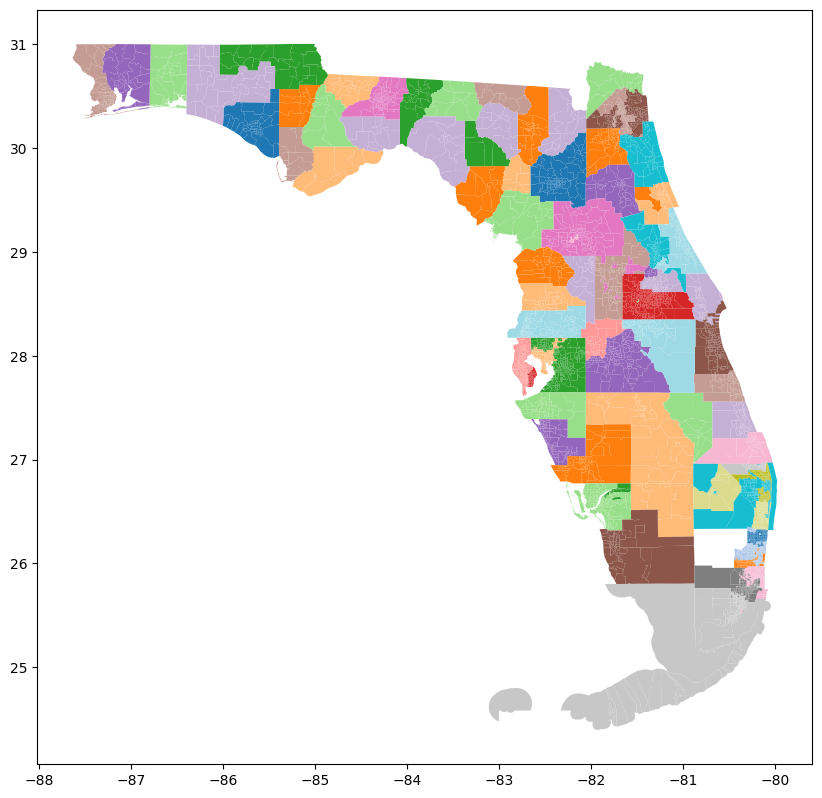

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

prefix_path = "/Users/sherzodnimatullo/Downloads/"
project_shapefile = "./shapefiles/unprocessed/"

precincts = gpd.read_file(prefix_path + "fl_2020/fl_2020.shp")
blocks = gpd.read_file(prefix_path + "fl_pl2020_bg/fl_pl2020_bg.shp")

# Precincts Map
precincts.plot(figsize=(10,10), cmap="tab20")

<AxesSubplot: >

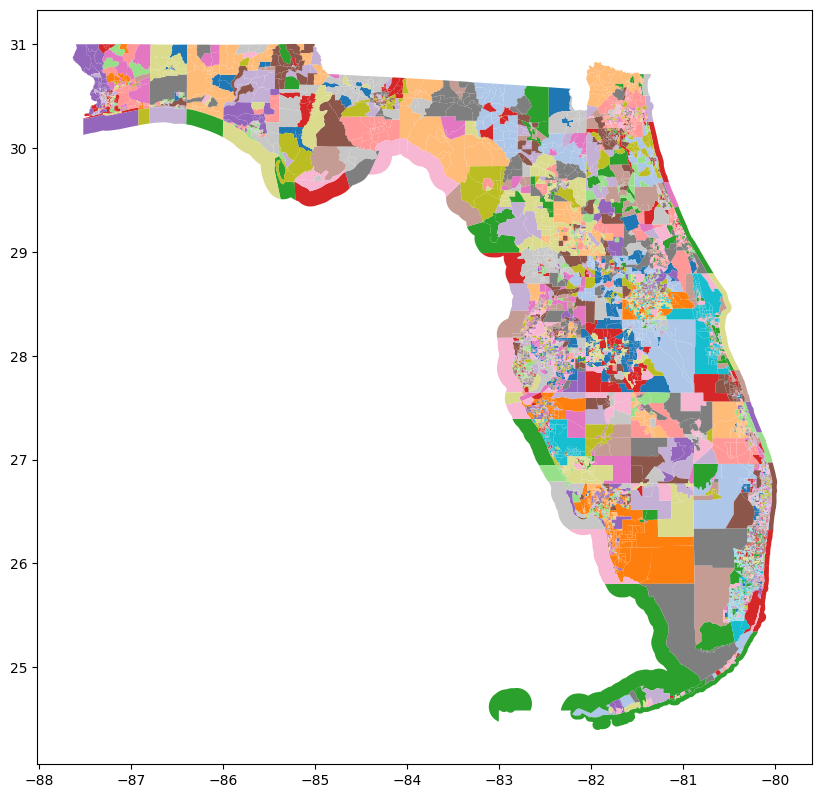

In [2]:
# Block Map
blocks.plot(figsize=(10,10), cmap="tab20")

In [3]:
print("Number of rows for blocks: ", len(blocks))
print("Block columns", blocks.columns)

print("Number of rows for precincts", len(precincts))
print("Block columns: ", precincts.columns)

Number of rows for blocks:  13388
Block columns Index(['STATEFP20', 'COUNTYFP20', 'TRACTCE20', 'BLKGRPCE20', 'GEOID20',
       'NAMELSAD20', 'MTFCC20', 'FUNCSTAT20', 'ALAND20', 'AWATER20',
       ...
       'P0050002', 'P0050003', 'P0050004', 'P0050005', 'P0050006', 'P0050007',
       'P0050008', 'P0050009', 'P0050010', 'geometry'],
      dtype='object', length=346)
Number of rows for precincts 6010
Block columns:  Index(['pct_std', 'county', 'precinct', 'G20PRERTRU', 'G20PREDBID',
       'G20PRELJOR', 'G20PREODEL', 'G20PRESLAR', 'G20PREGHAW', 'G20PRECBLA',
       'G20PREOWRI', 'geometry'],
      dtype='object')


In [4]:
ref = {
    "TOT_POP" : "P0010001",
    "WHITE_POP": "P0010003",
    "ASN_POP": "P0010006",
    "BLK_POP": "P0010004",
    "HSP_POP": "P0020002"
}

In [5]:
import maup
maup.progress.enabled = True

# Validify Geometries
precincts["geometry"] = maup.make_valid(precincts)

In [6]:
blocks["geometry"] = maup.make_valid(blocks)

In [7]:
# Assignment
blocks.to_crs(precincts.crs)
assignment = maup.assign(blocks, precincts)

/Users/sherzodnimatullo/code/projects/416/gerrychain/env/lib/python3.10/site-packages/maup/indexed_geometries.py:16: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  geometry.index = i
/Users/sherzodnimatullo/code/projects/416/gerrychain/env/lib/python3.10/site-packages/maup/indexed_geometries.py:17: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)
100%|████████████████████████████████████████████████████████████████████████████| 6010/6010 [00:07<00:00, 803.84it/s]
/Users/sherzodnimatullo/code/projects/416/gerrychain/env/lib/python3.10/site-packages/maup/indexed_geometries.py:17: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)
100%|████████████████████████████████████████████████████████████

In [8]:
precincts[list(ref.keys())] = blocks[ref.values()].groupby(assignment).sum()

<AxesSubplot: >

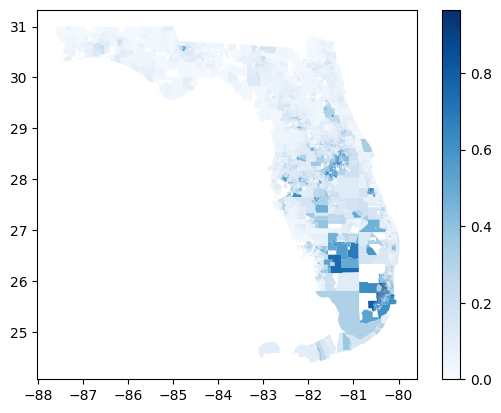

In [9]:
precincts.plot(column=precincts.HSP_POP.divide(precincts.TOT_POP), cmap="Blues", legend=True)

In [10]:
# Sanity Check
print("Total population of blocks", blocks["P0010001"].sum())
print("Total population of precincts", precincts["TOT_POP"].sum())

Total population of blocks 21538187
Total population of precincts 21538187.0


<AxesSubplot: >

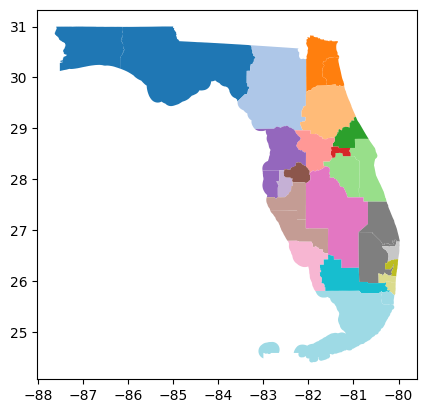

In [11]:
districts = gpd.read_file(prefix_path + "fl_cong_adopted_2022-1/P000C0109.shp")
districts.plot(cmap="tab20")

In [12]:
districts.head()

,LONGNAME,SHORTNAME,DISTRICT,COLOR,TOTAL,TARGET_DEV,geometry
0,District 1,D1,1,-190427942,769221,0,"POLYGON ((-86.78570 30.99699, -86.77811 30.996..."
1,District 2,D2,2,-112762508,769221,0,"POLYGON ((-86.14864 30.73410, -86.14862 30.734..."
2,District 3,D3,3,-116800934,769221,0,"POLYGON ((-83.17097 30.38523, -83.17103 30.385..."
3,District 4,D4,4,329774720,769221,0,"POLYGON ((-82.04924 30.27344, -82.04931 30.275..."
4,District 5,D5,5,-9183360,769221,0,"POLYGON ((-81.32019 30.25293, -81.31863 30.246..."


In [13]:
districts.to_crs(precincts.crs, inplace=True)
assignment = maup.assign(precincts, districts.set_index("DISTRICT"))

precincts["DISTRICT"] = assignment

/Users/sherzodnimatullo/code/projects/416/gerrychain/env/lib/python3.10/site-packages/maup/indexed_geometries.py:16: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  geometry.index = i
/Users/sherzodnimatullo/code/projects/416/gerrychain/env/lib/python3.10/site-packages/maup/indexed_geometries.py:17: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)
100%|████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 175.71it/s]
/Users/sherzodnimatullo/code/projects/416/gerrychain/env/lib/python3.10/site-packages/maup/indexed_geometries.py:17: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)
100%|████████████████████████████████████████████████████████████

0       3
1       3
2       3
3       3
4       3
       ..
6005    9
6006    9
6007    9
6008    9
6009    9
Name: DISTRICT, Length: 6010, dtype: int64

<AxesSubplot: >

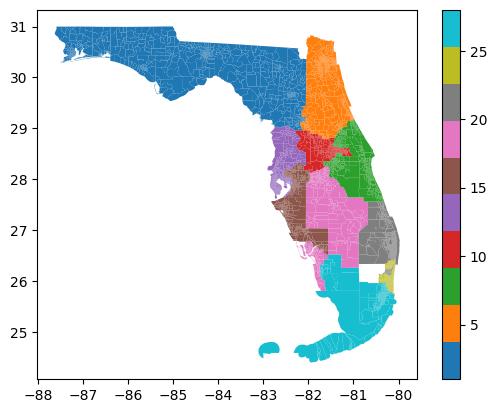

In [14]:
precincts.plot(column="DISTRICT", legend=True, cmap="tab10")

In [15]:
district_demographics = precincts.groupby("DISTRICT").sum()[["TOT_POP", "BLK_POP", "ASN_POP", "HSP_POP"]]
district_demographics.head()

precincts.to_file("./shapefiles/processed/florida/FL_VTDs.shp")

/var/folders/sc/7lv0tvq971z1q7mljvkw2ky80000gn/T/ipykernel_92712/863547920.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  district_demographics = precincts.groupby("DISTRICT").sum()[["TOT_POP", "BLK_POP", "ASN_POP", "HSP_POP"]]
